# Grover's Algorithm

Grover's algorithm can speed up an unstructured search problem quadratically.
It can serve as a general trick (amplitude amplification) or subroutine to obtain quadratic run time improvements for a variety of other algorithms.

## Formal Definition

For given an oracle function 
$$f : \{0, 1\}^n -> \{0, 1\}^n, $$ and 
$$ω : f(ω) = a,    \mbox{find ω.}
$$

The purpose of Grover's algorithm is "searching a database", but it really performs "inverting a function", i.e., if we 
have a function $y=f(x)$ that can be evaluated on a quantum computer, Grover's algorithm allows us to calculate $x$, given $y$. Inverting a function is related to the searching of a database because we could come up with a function that produces a particular value of $y$, if $x$ matches a desired entry in a database, and another value of $y$ for other values of $x$.

### Unstructured Search

Suppose we have a large list of $N$ items. Among these items there is one item $w$ with a unique property that we wish to locate. For example, we have to find a blue ball among $N-1$ grey balls.

<img src="images/grover_search.png">

To find the blue ball using classical computation, we need to check on average $N/2$ of these balls ($N$ in the worst case). But using Grover's algorithm, we can find it in roughly $\sqrt{N}$ steps - using the amplitude amplification trick. The algorithm does not use the list's internal structure, i.e., it is *generic;* as well.

<b>Example : </b>Suppose that the bit string is small - 5 bits. The classical algorithm would require $2^5 − 1=31$ attempts to find the correct bit pattern $x$ (say $01001$), while Grover’s algorithm would require $\sqrt25 ≈ 6$ attempts.

### Oracle

A common way to encode the list items is by using a function $f$ that returns $f(x) = 0$ for all unwanted items $x$ and $f(w) = 1$ for the $w$. To use a quantum computer for such a problem, we provide the items in superposition to this function - we encode the function into a unitary operator called an *oracle*. 

1. First we choose a binary encoding of the items $x, w \in \{0,1\}^n$ so that $N = 2^n$, so that we can represent it in terms of qubits on a quantum computer. 
2. Then we define the oracle matrix $U_f$ to act on any of the simple, standard basis states $| x \rangle$ by 
$$U_f | x \rangle = (-1)^{f(x)}  |  x \rangle.$$

We see that if $x$ is an unwanted item, the oracle does nothing to the state. But, when we apply the oracle to the basis state $| w \rangle$, it maps $U_f | w \rangle = -| w \rangle$. Geometrically, this <i>oracle</i> unitary performs a reflection about the origin for the marked item in an $N = 2^n$ dimensional vector space.


### Amplitude amplification

The list of items is unstructured - so we cannot exploit the information from the search space. We do not know where the $w$ item is. Therefore, any guess of its location is as good as any other, which can be expressed in terms of a
uniform superposition: 
$$|\psi \rangle = \frac{1}{\sqrt{2^n}} \sum_{x = 0}^{2^n -1} | x\rangle= \frac{1}{\sqrt{N}} \sum_{x = 0}^{N -1} | x\rangle.$$

Now, if we measure $|\psi \rangle$ in the standard computational basis $\{ | x \rangle \}$, this superposition will collapse to any one of the basis states with the same probability of $\frac{1}{N} = \frac{1}{2^n}$. Our chances of guessing the right value $w$ is therefore $1$ in $2^n$. Hence, on average we would need to try about $N = 2^n$ times to guess the correct item.

With <b>amplitude amplification</b>, a quantum computer significantly enhances this probability. This procedure <u>amplifies</u> the amplitude of the $w$ item, so that measuring the final state will return the right item with near-certainty. 

<b><u>Geometrical Interpretation</b></u>

Amplitude Amplification is essentially two reflections that generate a rotation of the desired vector in a 2D plane. 
We know of two states - $| w \rangle$ and the uniform superposition $| \psi \rangle$. These two vectors span a 2D plane in the vector space $\mathbb{C}^N.$ But these two are not orthogonal as $| w \rangle$ occurs in the superposition with amplitude $N^{-1/2}$.

So we introduce an additional state $|\psi'\rangle$ so that it is in the span of these two vectors and is orthogonal to $| w \rangle$ and is obtained from $|\psi \rangle$ by removing $| w \rangle$ and rescaling. 

**Step 0**: The amplitude amplification starts with the uniform superposition $| \psi \rangle$. Such uniform superposition is constructed from $| \psi \rangle = H^{\otimes n} | 0 \rangle^n$). At $t = 0$ the initial state is $| \psi_0 \rangle$.

<img src="images/grover_step0.png">


The 2D plane spanned by $|w\rangle, |s\rangle$ - if we measure such a state we will get the bar graph of the amplitudes of the state $| \psi_t \rangle$ for the case $N = 2^2 = 4$. The average amplitude is indicated by a dashed line.

**Step 1**: At time t=t, We apply the oracle reflection $U_f$ to the state $U_f | \psi_t \rangle =  | \psi_{t'} \rangle$.

<img src="images/grover_step1.png">

As shown in the above figure, on applying this oracle, a reflection of the state $|\psi_t\rangle$ about $-|w\rangle$ takes place. This transformation means that the amplitude of the $|w\rangle$ state becomes negative. This results in an overall lowering of the average amplitude.

**Step 2**: Then we apply an additional reflection $U_\psi$ about the state $|\psi\rangle$: $U_\psi = 2|\psi\rangle\langle s| - I$. This transformation maps the state to $U_\psi | \psi_{t'} \rangle$ and completes the transformation $|\psi_{t+1}\rangle = U_\psi U_f | \psi_t \rangle$. 

<img src="images/grover_step2.png">

Two reflections always correspond to a rotation. The transformation $U_\psi U_f$ rotates the initial state $|\psi\rangle$ closer towards the $|w\rangle$. The action of the reflection $U_\psi$ in the amplitude bar diagram can be understood as a reflection about the average amplitude. Since the average amplitude has been lowered by the first reflection, this transformation boosts the negative amplitude of $|w\rangle$ to roughly three times its original value, while it decreases the other amplitudes. We then go to **Step 1** again, to repeat the application. This procedure will be repeated several times to zero in on the $|w\rangle$.

After $t$ steps the state will have transformed to $| \psi_t \rangle = (U_s U_f)^t  | \psi_0 \rangle.$

We have to repeat the steps roughly $\sqrt{N}$ times. This becomes clear when looking at the amplitudes of the state $| \psi_t \rangle$. We can see that the amplitude of $| w \rangle$ grows linearly with the number of applications $\sim t N^{-1/2}$. However, since we are dealing with amplitudes and not probabilities, the vector space's dimension enters as a square root. Therefore it is the amplitude, and not just the probability, that is being amplified in this procedure.

In the case that there are multiple solutions, $M$,(i.e., a number of $|w_i\rangle$ states are the solution.) it can be shown that roughly $\sqrt{(N/M)}$ rotations will suffice.

<img src="images/grover_algorithm.png">


## Qiskit Implementation

In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

backend = BasicAer.get_backend('qasm_simulator')

### 1. 3-Qubit Implementation

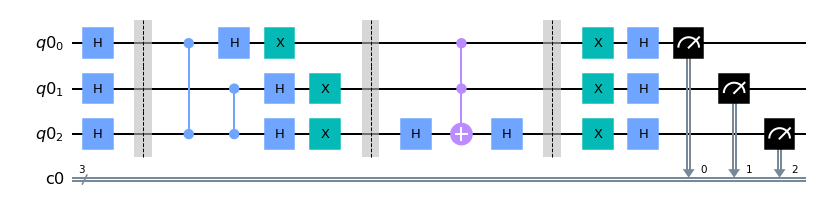

In [2]:
qr = QuantumRegister(3)  # Initialize qubits
cr = ClassicalRegister(3)  # Initialize bits for record measurements
circuit = QuantumCircuit(qr, cr)

# We want to search two marked states
# |101> and |110>

# Apply Hadamard to all qubits
circuit.h(qr)
circuit.barrier()

# Phase oracle (Marks states |101> and |110> as results)
circuit.cz(qr[2], qr[0])
circuit.cz(qr[2], qr[1])

# Inversion around the average
circuit.h(qr)
circuit.x(qr)
circuit.barrier()
circuit.h(qr[2])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.h(qr[2])
circuit.barrier()
circuit.x(qr)
circuit.h(qr)

# Measure
circuit.measure(qr, cr)
circuit.draw('mpl')

In [3]:
# Run our circuit with local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 20
results = execute(circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
print(answer)

{'110': 10, '101': 10}


### 2. 3-Qubit Implementation

We create a phase oracle that will mark states ($|000\rangle$ and $|111\rangle $) as the results (step 1).

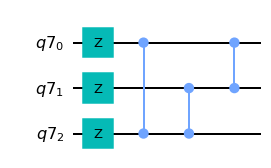

In [4]:
def get_phase_oracle_circuit(circuit, register):
    #Apply Z to all qubits
    circuit.z(qr)
    #a Z will reverse the phase of the qubit, which we do not want
    #So we need to control it
    #If 2 is 1, we want both 0's and 1's phase to reverse
    circuit.cz(qr[2],qr[0])
    circuit.cz(qr[2],qr[1])
    #If 1 is 1, we also want 0's phase to reverse
    circuit.cz(qr[1],qr[0])
    #So now if all 0,1,2 qubits are zero nothing will happen
    #But if any of 1,2 qubit is 1, phase of all the qubits will reverse

qr = QuantumRegister(3)
oracleCircuit = QuantumCircuit(qr)
#oracleCircuit.z(qr)
get_phase_oracle_circuit(oracleCircuit, qr)
oracleCircuit.draw(output="mpl")

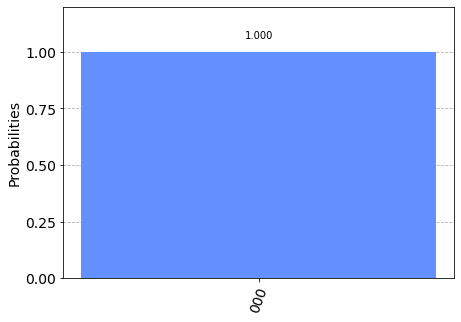

In [5]:
oracleCircuit.measure_all()
results = execute(oracleCircuit, backend=backend, shots=1024).result()
oracleCircuit.remove_final_measurements()
answer = results.get_counts()
plot_histogram(answer)

Next we set up the circuit for inversion about the average (step 2), where we will first need to define a function that creates a multiple-controlled Z gate.

In [6]:
def n_controlled_Z(circuit, controls, target):
    """Implement a Z gate with multiple controls"""
    if (len(controls) > 2):
        raise ValueError('The controlled Z with more than 2 controls is not implemented')
    elif (len(controls) == 1):
        circuit.h(target)
        circuit.cx(controls[0], target)
        circuit.h(target)
    elif (len(controls) == 2):
        circuit.h(target)
        circuit.ccx(controls[0], controls[1], target)
        circuit.h(target)

In [7]:
def inversion_about_average(circuit, register, n):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    n_controlled_Z(circuit, [register[j] for j in range(n-1)], register[n-1])
    circuit.x(register)
    circuit.h(register)

Here is a circuit of the inversion about the average for three qubits.

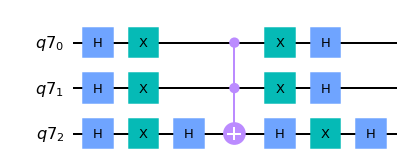

In [8]:
qAverage = QuantumCircuit(qr)
inversion_about_average(qAverage, qr, 3)
qAverage.draw(output='mpl')

Now we put the pieces together, with the creation of a uniform superposition at the start of the circuit and a measurement at the end. Note that since there are 2 solutions and 8 possibilities, we will only need to run one iteration. 

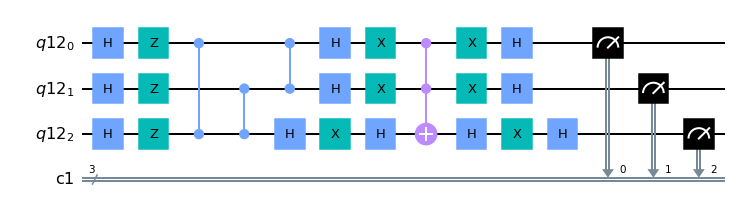

In [9]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

get_phase_oracle_circuit(groverCircuit, qr)
inversion_about_average(groverCircuit, qr, 3)

groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

## Experiment with Simulators

We can run the above circuit on the simulator. 

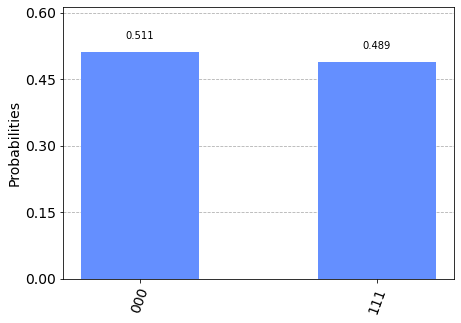

In [10]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

As we can see, the algorithm discovers our marked states.

## Experiment with Real Devices

We can run the circuit on the real device as shown below.

In [12]:
# Load our saved IBMQ accounts and get the least busy backend device
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')

backend_lb = least_busy(provider.backends(simulator=False))
print("Least busy backend: ", backend_lb)

Least busy backend:  ibmq_burlington


In [13]:
# run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

backend = backend_lb
shots = 1024
job_exp = execute(groverCircuit, backend=backend, shots=shots)

job_monitor(job_exp, interval = 2)

Job Status: job has successfully run


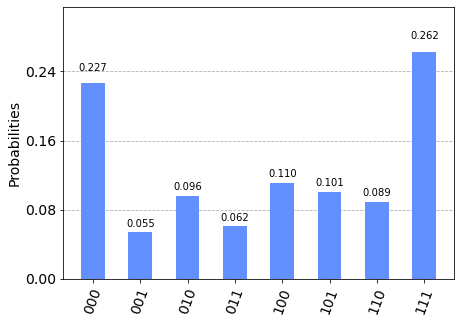

In [14]:
# get the results from the computation
results = job_exp.result()
answer = results.get_counts(groverCircuit)
plot_histogram(answer)